In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("/content/housing_price_dataset.csv")

In [4]:
df

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065
...,...,...,...,...,...,...
49995,1282,5,3,Rural,1975,100080.865895
49996,2854,2,2,Suburb,1988,374507.656727
49997,2979,5,3,Suburb,1962,384110.555590
49998,2596,5,2,Rural,1984,380512.685957


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    50000 non-null  int64  
 1   Bedrooms      50000 non-null  int64  
 2   Bathrooms     50000 non-null  int64  
 3   Neighborhood  50000 non-null  object 
 4   YearBuilt     50000 non-null  int64  
 5   Price         50000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ MB


In [6]:
df.columns

Index(['SquareFeet', 'Bedrooms', 'Bathrooms', 'Neighborhood', 'YearBuilt',
       'Price'],
      dtype='object')

In [7]:
df.isna().sum()

SquareFeet      0
Bedrooms        0
Bathrooms       0
Neighborhood    0
YearBuilt       0
Price           0
dtype: int64

<Axes: >

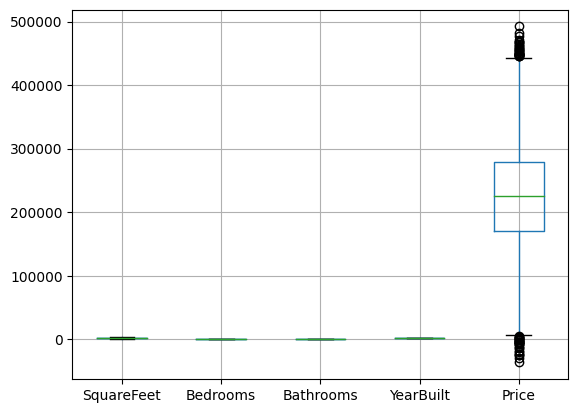

In [9]:
df.boxplot()

In [10]:
# encoding

In [11]:
df.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065


In [13]:
df.nunique()

SquareFeet       2000
Bedrooms            4
Bathrooms           3
Neighborhood        3
YearBuilt          72
Price           50000
dtype: int64

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [15]:
df['Neighborhood'] = le.fit_transform(df['Neighborhood'])

In [16]:
df.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,0,1969,215355.283618
1,2459,3,2,0,1980,195014.221626
2,1860,2,1,1,1970,306891.012076
3,2294,2,1,2,1996,206786.787153
4,2130,5,2,1,2001,272436.239065


In [18]:
df.corr()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
SquareFeet,1.000000,-0.002638,-0.003275,0.011186,0.000482,0.750720
Bedrooms,-0.002638,1.000000,0.007405,-0.004208,0.003147,0.072624
Bathrooms,-0.003275,0.007405,1.000000,0.001613,0.003748,0.028418
Neighborhood,0.011186,-0.004208,0.001613,1.000000,-0.000174,0.016429
YearBuilt,0.000482,0.003147,0.003748,-0.000174,1.000000,-0.002288
Price,0.750720,0.072624,0.028418,0.016429,-0.002288,1.000000


<Axes: >

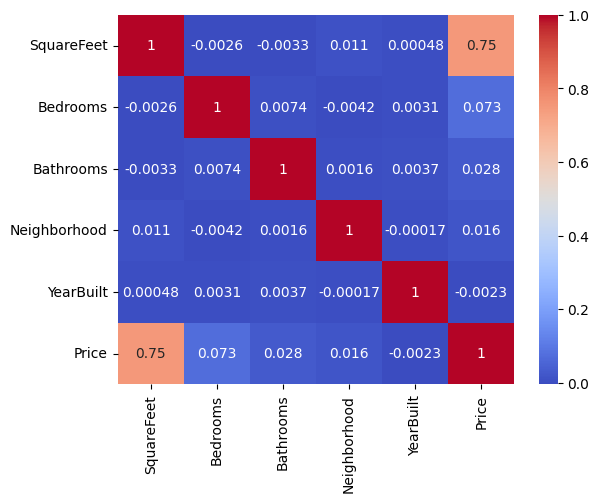

In [24]:
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

In [17]:
# scaling

In [25]:
df.tail()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
49995,1282,5,3,0,1975,100080.865895
49996,2854,2,2,1,1988,374507.656727
49997,2979,5,3,1,1962,384110.555590
49998,2596,5,2,0,1984,380512.685957
49999,1572,5,3,0,2011,221618.583218


In [28]:
x = df.drop(['Price','SquareFeet'],axis=1)
y = df[['Price','SquareFeet']]

In [29]:
x.head()

,Bedrooms,Bathrooms,Neighborhood,YearBuilt
0,4,1,0,1969
1,3,2,0,1980
2,2,1,1,1970
3,2,1,2,1996
4,5,2,1,2001


In [30]:
y.head()

,Price,SquareFeet
0,215355.283618,2126
1,195014.221626,2459
2,306891.012076,1860
3,206786.787153,2294
4,272436.239065,2130


In [31]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

In [32]:
newx = minmax.fit_transform(y)

In [33]:
y = pd.DataFrame(newx,columns=['Price','SquareFeet'])


In [36]:
y.head()

,Price,SquareFeet
0,0.476459,0.563282
1,0.437991,0.729865
2,0.649565,0.430215
3,0.460255,0.647324
4,0.584406,0.565283


In [37]:
df = pd.concat([x,y],axis=1)

In [38]:
df

,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price,SquareFeet
0,4,1,0,1969,0.476459,0.563282
1,3,2,0,1980,0.437991,0.729865
2,2,1,1,1970,0.649565,0.430215
3,2,1,2,1996,0.460255,0.647324
4,5,2,1,2001,0.584406,0.565283
...,...,...,...,...,...,...
49995,5,3,0,1975,0.258459,0.141071
49996,2,2,1,1988,0.777437,0.927464
49997,5,3,1,1962,0.795597,0.989995
49998,5,2,0,1984,0.788793,0.798399


In [39]:
# SVM ALGO

In [40]:
df.head()

,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price,SquareFeet
0,4,1,0,1969,0.476459,0.563282
1,3,2,0,1980,0.437991,0.729865
2,2,1,1,1970,0.649565,0.430215
3,2,1,2,1996,0.460255,0.647324
4,5,2,1,2001,0.584406,0.565283


In [ ]:
# it is a regression dataset so we doing SVM REGRESSION IN PRICE

In [41]:
x = df.drop('Price',axis=1)
x1 = pd.DataFrame(x)
y = df['Price']
y1 = pd.DataFrame(y)

In [42]:
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.25,random_state=42)

In [43]:
from sklearn.svm import SVR
svm = SVR(kernel='rbf')

In [44]:
model = svm.fit(x1_train,y1_train)
y1_pred = model.predict(x1_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [49]:
print(y1_test)

          Price
33553  0.392265
9427   0.309203
199    0.535569
12447  0.531103
39489  0.581932
...         ...
9771   0.456065
34737  0.249976
30390  0.347413
6797   0.324974
37270  0.307596

[12500 rows x 1 columns]


In [51]:
y1_pred

array([0.49536491, 0.49529545, 0.4962264 , ..., 0.49359279, 0.49570271,
       0.48987035])

In [45]:
# checking the relation so being it is a regression prob we use mean_squared_error and r2_score

In [46]:
from sklearn.metrics import mean_squared_error,r2_score

In [47]:
print("the mse is:", mean_squared_error(y1_test,y1_pred))

the mse is: 0.020394852894567276


In [48]:
print("the r2score is:", r2_score(y1_test,y1_pred))

the r2score is: 0.011301590790433691


In [53]:
x1.head()

,Bedrooms,Bathrooms,Neighborhood,YearBuilt,SquareFeet
0,4,1,0,1969,0.563282
1,3,2,0,1980,0.729865
2,2,1,1,1970,0.430215
3,2,1,2,1996,0.647324
4,5,2,1,2001,0.565283


In [54]:
y1.head()

,Price
0,0.476459
1,0.437991
2,0.649565
3,0.460255
4,0.584406


In [55]:
model.predict([[4,	1,	0,	1969,	0.563282]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


array([0.49490224])